In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Pre-Processing and small analysis

In [26]:
df = pd.read_csv('data.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  

print(df.head())

   Episode                                              Title  Season               Arc            Saga    Air Date  Opening    Ending                                            Summary
0        1  I'm Luffy! The Man Who Will Become the Pirate ...     1.0  Romance Dawn Arc  East Blue Saga  1999-10-20  We Are!  Memories  Luffy is cast at sea in a barrel. Sailors on a...
1        2  The Great Swordsman Appears! Pirate Hunter Ror...     1.0  Romance Dawn Arc  East Blue Saga  1999-11-17  We Are!  Memories  Luffy and Koby arrive at Shells Town, a town w...
2        3  Morgan vs. Luffy! Who's This Mysterious Beauti...     1.0  Romance Dawn Arc  East Blue Saga  1999-11-24  We Are!  Memories  Luffy returns the katana to Zoro, who uses the...
3        4       Luffy's Past! The Red-Haired Shanks Appears!     1.0   Orange Town Arc  East Blue Saga   1999-12-8  We Are!  Memories  The burglar girl's dinghy is discovered by thr...
4        5  Fear, Mysterious Power! Pirate Clown Captain B...     1.0 

## Initial clean-up

Let us change from Arabasta to Alabasta everywhere to keep consistency

In [27]:
df['Arc'] = df['Arc'].str.replace('Arabasta', 'Alabasta')
df['Saga'] = df['Saga'].str.replace('Arabasta', 'Alabasta')
df['Title'] = df['Title'].str.replace('Arabasta', 'Alabasta')
df['Summary'] = df['Summary'].str.replace('Arabasta', 'Alabasta')

Same thing now with Levely to Reverie

In [28]:
df['Arc'] = df['Arc'].str.replace('Levely', 'Reverie')
df['Saga'] = df['Saga'].str.replace('Levely', 'Reverie')
df['Title'] = df['Title'].str.replace('Levely', 'Reverie')
df['Summary'] = df['Summary'].str.replace('Levely', 'Reverie')

In [29]:
df.describe(include='all')

,Episode,Title,Season,Arc,Saga,Air Date,Opening,Ending,Summary
count,1121.000000,1121,1100.000000,1121,1121,1121,1121,371,1120
unique,NaN,1121,NaN,54,11,1099,28,22,1120
top,NaN,I'm Luffy! The Man Who Will Become the Pirate ...,NaN,Wano Country Arc (Cont.),Wano Country Saga,1999-12-29,We Go!,We Go!,Luffy is cast at sea in a barrel. Sailors on a...
freq,NaN,1,NaN,132,196,3,73,38,1
mean,561.517395,NaN,13.450000,NaN,NaN,NaN,NaN,NaN,NaN
std,324.181910,NaN,6.115974,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,281.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,562.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,842.000000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Check for exact missing values
missing_summary = df['Summary'].isna()
# Check for empty strings or strings with only whitespace
empty_summary = df['Summary'].str.strip() == ''
# Check for other errors
other_missing = df['Summary'].str.lower().isin(['none', 'n/a', 'null', ''])
# Combine all conditions
missing_summary_ep = df[missing_summary | empty_summary | other_missing]

print(missing_summary_ep)

      Episode                              Title  Season          Arc        Saga    Air Date  Opening        Ending Summary
1120     1122  The Last Lesson! Impact Inherited    21.0  Egghead Arc  Final Saga  2024-10-13  UUUUUS!  Dear sunrise     NaN


Only 1 episode doesn't have a summary, the one who hasn't aired yet, so let us remove it!

In [31]:
df = df.dropna(subset=['Summary'])
df.describe(include='all')

,Episode,Title,Season,Arc,Saga,Air Date,Opening,Ending,Summary
count,1120.000000,1120,1099.000000,1120,1120,1120,1120,370,1120
unique,NaN,1120,NaN,54,11,1098,28,22,1120
top,NaN,I'm Luffy! The Man Who Will Become the Pirate ...,NaN,Wano Country Arc (Cont.),Wano Country Saga,1999-12-29,We Go!,We Go!,Luffy is cast at sea in a barrel. Sailors on a...
freq,NaN,1,NaN,132,196,3,73,38,1
mean,561.016964,NaN,13.443130,NaN,NaN,NaN,NaN,NaN,NaN
std,323.893261,NaN,6.114511,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,280.750000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,561.500000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,841.250000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Analysing Seasons

In [32]:
missing_season = df['Season'].isna()
print(df[missing_season])
print(df['Season'].unique())

      Episode                                              Title  Season                       Arc                    Saga    Air Date            Opening Ending                                            Summary
335       336  Chopper Man Departs! Protect the TV Station by...     NaN            Ice Hunter Arc      Thriller Bark Saga  2007-12-23           Jungle P    NaN  Chopper Man and Namifia are low on money. Dr. ...
405       406  Special Historical Arc - Boss Luffy Appears Again     NaN   Sabaody Archipelago Arc         Summit War Saga  2009-06-21    Share the World    NaN  Usopp visits The Pinwheel to tell Onami, Sanji...
406       407  Special Historical Arc - Destroy! Thriller Com...     NaN   Sabaody Archipelago Arc         Summit War Saga  2009-06-28    Share the World    NaN  Brook finds and attacks Kumashi and some zombi...
425       426  Movie-connected Special: The 'Gold Lion's' Amb...     NaN      Little East Blue Arc         Summit War Saga  2009-11-15  Kaze wo Sagashit

Since it's a normal filler colab episode which is important and has information we will keep it. Not having a season just means it wasn't released on DVD

In [33]:
df.describe(include='all')

,Episode,Title,Season,Arc,Saga,Air Date,Opening,Ending,Summary
count,1120.000000,1120,1099.000000,1120,1120,1120,1120,370,1120
unique,NaN,1120,NaN,54,11,1098,28,22,1120
top,NaN,I'm Luffy! The Man Who Will Become the Pirate ...,NaN,Wano Country Arc (Cont.),Wano Country Saga,1999-12-29,We Go!,We Go!,Luffy is cast at sea in a barrel. Sailors on a...
freq,NaN,1,NaN,132,196,3,73,38,1
mean,561.016964,NaN,13.443130,NaN,NaN,NaN,NaN,NaN,NaN
std,323.893261,NaN,6.114511,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,280.750000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,561.500000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,841.250000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Analysing Arcs

In [34]:
# List of all arcs
arcs = df['Arc'].unique()
print(arcs)
print("Count: ", len(arcs))

['Romance Dawn Arc' 'Orange Town Arc' 'Syrup Village Arc' 'Baratie Arc'
 'Arlong Park Arc' 'Buggy Side Story Arc' 'Loguetown Arc'
 'Warship Island Arc' 'Reverse Mountain Arc' 'Whisky Peak Arc'
 'Koby and Helmeppo Arc' 'Little Garden Arc' 'Drum Island Arc'
 'Alabasta Arc' 'Post-Alabasta Arc' 'Goat Island Arc' 'Ruluka Island Arc'
 'Jaya Arc' 'Skypiea Arc' 'G-8 Arc' 'Long Ring Long Land Arc'
 "Ocean's Dream Arc" "Foxy's Return Arc" 'Long Ring Long Land Arc (Cont.)'
 'Water 7 Arc' 'Enies Lobby Arc' 'Post-Enies Lobby Arc' 'Ice Hunter Arc'
 'Thriller Bark Arc' 'Spa Island Arc' 'Sabaody Archipelago Arc'
 'Amazon Lily Arc' 'Impel Down Arc' 'Little East Blue Arc'
 'Impel Down Arc (Cont.)' 'Marineford Arc' 'Post-War Arc'
 'Return to Sabaody Arc' 'Fish-Man Island Arc' "Z's Ambition Arc"
 'Punk Hazard Arc' 'Caesar Retrieval Arc' 'Dressrosa Arc'
 'Silver Mine Arc' 'Zou Arc' 'Marine Rookie Arc' 'Whole Cake Island Arc'
 'Reverie Arc' 'Wano Country Arc' 'Cidre Guild Arc'
 'Wano Country Arc (Cont.)' "U

As we can see above, there are a number of Arcs that are continuation of other arcs, let us join them since, after all, they are the same arc. Also there are some arcs with an extra spacing after arc, let us remove it also

In [35]:
df['Arc'] = df['Arc'].str.replace('(Cont.)', '')
df['Arc'] = df['Arc'].str.replace('(Cont. 2)', '')
df['Arc'] = df['Arc'].str.replace('Arc ', 'Arc')

In [36]:
arcs = df['Arc'].unique()
print(arcs)
print("Count: ", len(arcs))

['Romance Dawn Arc' 'Orange Town Arc' 'Syrup Village Arc' 'Baratie Arc'
 'Arlong Park Arc' 'Buggy Side Story Arc' 'Loguetown Arc'
 'Warship Island Arc' 'Reverse Mountain Arc' 'Whisky Peak Arc'
 'Koby and Helmeppo Arc' 'Little Garden Arc' 'Drum Island Arc'
 'Alabasta Arc' 'Post-Alabasta Arc' 'Goat Island Arc' 'Ruluka Island Arc'
 'Jaya Arc' 'Skypiea Arc' 'G-8 Arc' 'Long Ring Long Land Arc'
 "Ocean's Dream Arc" "Foxy's Return Arc" 'Water 7 Arc' 'Enies Lobby Arc'
 'Post-Enies Lobby Arc' 'Ice Hunter Arc' 'Thriller Bark Arc'
 'Spa Island Arc' 'Sabaody Archipelago Arc' 'Amazon Lily Arc'
 'Impel Down Arc' 'Little East Blue Arc' 'Marineford Arc' 'Post-War Arc'
 'Return to Sabaody Arc' 'Fish-Man Island Arc' "Z's Ambition Arc"
 'Punk Hazard Arc' 'Caesar Retrieval Arc' 'Dressrosa Arc'
 'Silver Mine Arc' 'Zou Arc' 'Marine Rookie Arc' 'Whole Cake Island Arc'
 'Reverie Arc' 'Wano Country Arc' 'Cidre Guild Arc' "Uta's Past Arc"
 'Egghead Arc']
Count:  50


### Analysing Sagas

In [37]:
sagas = df['Saga'].unique()
print(sagas)
print("Count: ", len(sagas))

['East Blue Saga' 'Alabasta Saga' 'Sky Island Saga' 'Water 7 Saga'
 'Thriller Bark Saga' 'Summit War Saga' 'Fish-Man Island Saga'
 'Dressrosa Saga' 'Whole Cake Island Saga' 'Wano Country Saga'
 'Final Saga']
Count:  11


### Analysing Openings and Endings

In [38]:
openings = df['Opening'].unique()
print(openings)
print("Count: ", len(openings))

endings = df['Ending'].unique()
print(endings)
print("Count: ", len(endings))

['We Are!' 'Believe' 'Hikari e' 'BON VOYAGE!' 'Kokoro no Chizu'
 'Brand New World' 'We Are! (Straw Hat version)'
 'We Are! (Straw Hat Version)' 'Crazy Rainbow' 'Jungle P'
 'We Are! (2008 Remix)' 'Share the World' 'Kaze wo Sagashite' 'One day'
 'Fight Together' 'We Go!' 'Hands Up!' 'Wake up!' 'Hard Knock Days'
 'We Can!' 'Hope' 'Super Powers' 'OVER THE TOP' "DREAMIN' ON" 'PAINT'
 'New Genesis' 'Saiko Totatsuten' 'UUUUUS!']
Count:  28
['Memories' 'RUN! RUN! RUN!' 'Watashi ga Iru Yo' 'Shōchi no suke'
 'BEFORE DAWN' 'fish' 'GLORY -Kimi ga Iru Kara-' 'Shining ray' 'Free Will'
 'FAITH' 'A to Z' 'Tsuki to Taiyo' 'Dreamship' 'Mirai Kōkai'
 'Eternal Pose' 'Dear Friends' 'Asu wa Kuru Kara' 'Adventure World' nan
 'We Go!' 'PAINT' 'Raise' 'Dear sunrise']
Count:  23


As we can see, there are two versions of We Are! (Straw Hat Version) due to a uppercase in the v, let us standardize both 

In [39]:
df['Opening'] = df['Opening'].replace('We Are! (Straw Hat version)', 'We Are! (Straw Hat Version)')

In [40]:
openings = df['Opening'].unique()
print(openings)
print("Count: ", len(openings))

endings = df['Ending'].unique()
print(endings)
print("Count: ", len(endings))

['We Are!' 'Believe' 'Hikari e' 'BON VOYAGE!' 'Kokoro no Chizu'
 'Brand New World' 'We Are! (Straw Hat Version)' 'Crazy Rainbow'
 'Jungle P' 'We Are! (2008 Remix)' 'Share the World' 'Kaze wo Sagashite'
 'One day' 'Fight Together' 'We Go!' 'Hands Up!' 'Wake up!'
 'Hard Knock Days' 'We Can!' 'Hope' 'Super Powers' 'OVER THE TOP'
 "DREAMIN' ON" 'PAINT' 'New Genesis' 'Saiko Totatsuten' 'UUUUUS!']
Count:  27
['Memories' 'RUN! RUN! RUN!' 'Watashi ga Iru Yo' 'Shōchi no suke'
 'BEFORE DAWN' 'fish' 'GLORY -Kimi ga Iru Kara-' 'Shining ray' 'Free Will'
 'FAITH' 'A to Z' 'Tsuki to Taiyo' 'Dreamship' 'Mirai Kōkai'
 'Eternal Pose' 'Dear Friends' 'Asu wa Kuru Kara' 'Adventure World' nan
 'We Go!' 'PAINT' 'Raise' 'Dear sunrise']
Count:  23


## Graphical Analysis

### Episodes per Arc

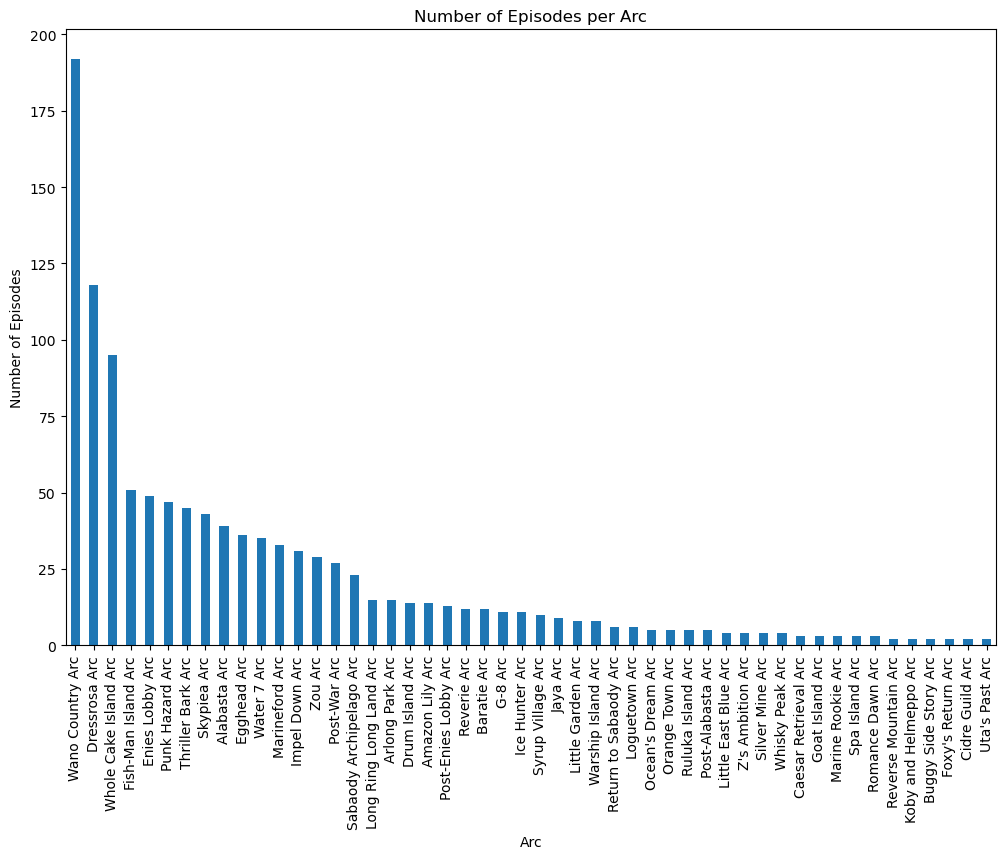

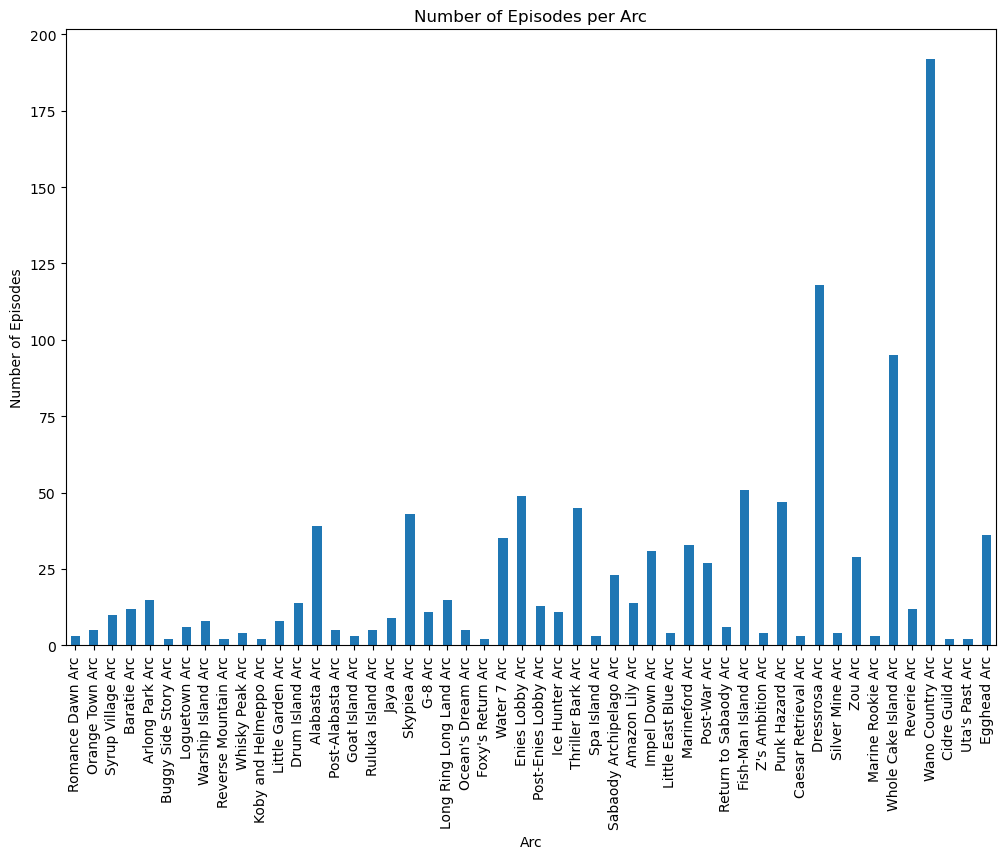

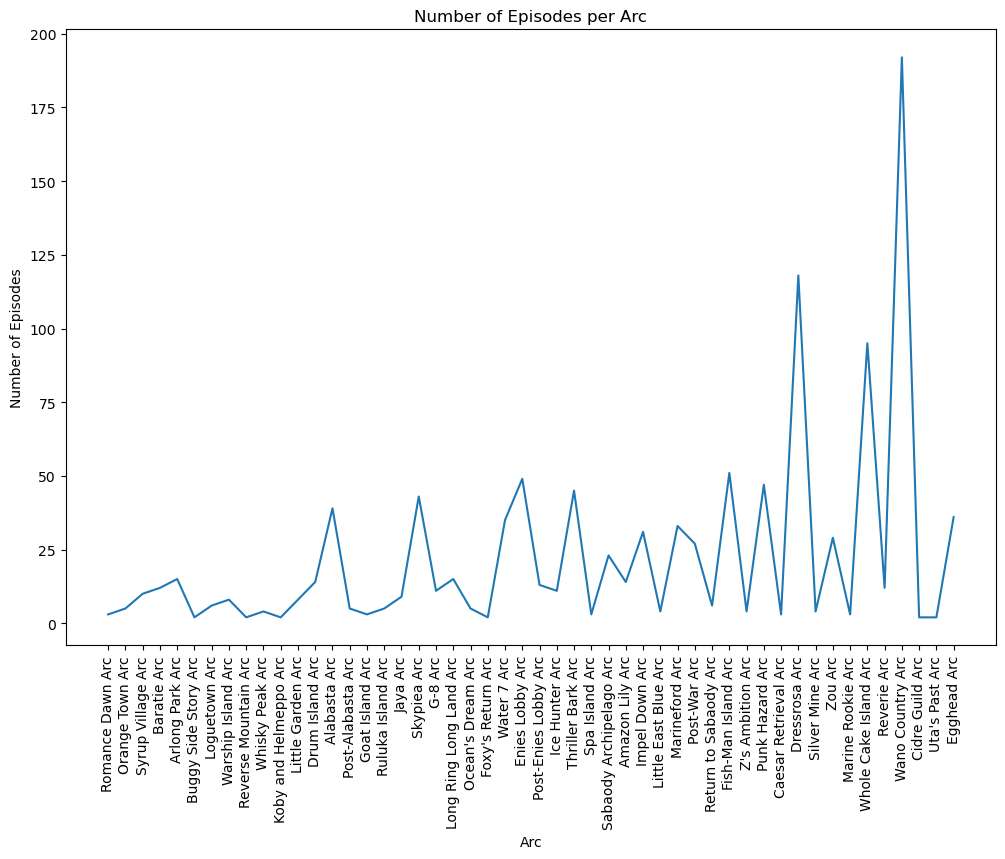

On average there were:  22.4
The most episodes in an arc were:  192  during  Wano Country Arc


In [41]:
arc_counts = df['Arc'].value_counts()

# Plot the data
arc_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.show()

arc_counts = arc_counts.loc[df['Arc'].unique()]

# Plot the data
arc_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.show()

arc_counts.plot(figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90, ticks=range(len(arc_counts)), labels=arc_counts.index )
plt.show()

# Average number of episodes per arc
print("On average there were: ", df.groupby('Arc')['Episode'].count().mean())
# Maximum number of episodes per arc
print("The most episodes in an arc were: ", df.groupby('Arc')['Episode'].count().max(), " during ", df.groupby('Arc')['Episode'].count().idxmax())  

### Episodes per Saga

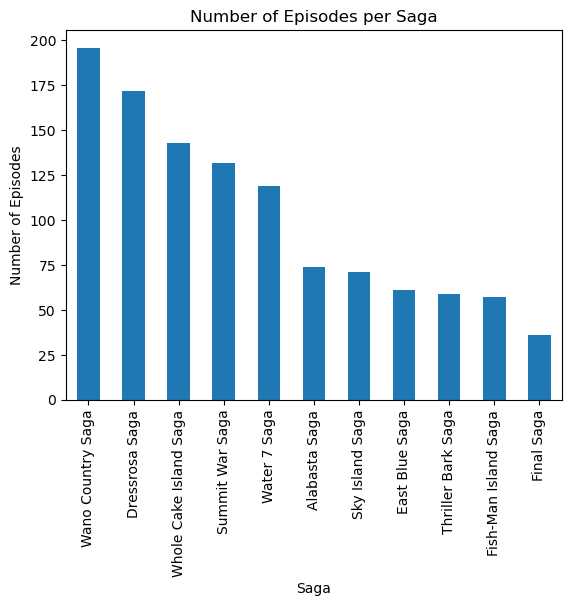

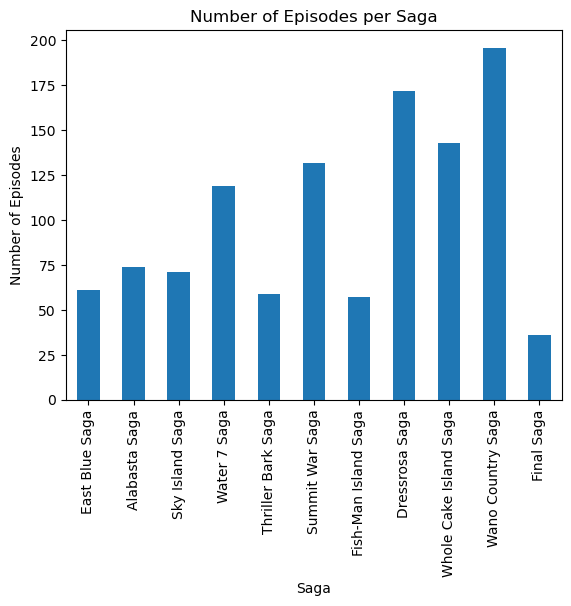

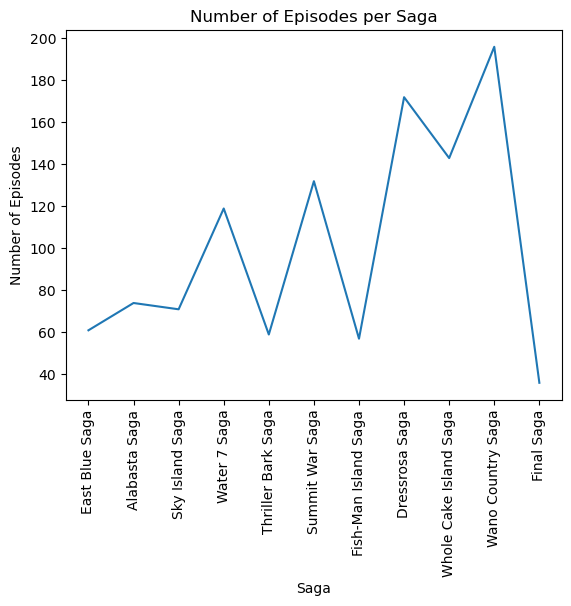

In [42]:
df['Saga'].value_counts().plot(kind='bar')
plt.title('Number of Episodes per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Episodes')
plt.show()

# Order it per appearance in the show
saga_counts = df['Saga'].value_counts()
saga_counts = saga_counts.loc[df['Saga'].unique()]

saga_counts.plot(kind='bar')
plt.title('Number of Episodes per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Episodes')
plt.show()

saga_counts.plot()
plt.title('Number of Episodes per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90, ticks=range(len(saga_counts)), labels=saga_counts.index )
plt.show()

In [43]:
# Average number of episodes per saga
print("On average there were: ", df.groupby('Saga')['Episode'].count().mean())
# Maximum number of episodes per saga
print("The most episodes in a saga were: ", df.groupby('Saga')['Episode'].count().max(), " during ", df.groupby('Saga')['Episode'].count().idxmax())

On average there were:  101.81818181818181
The most episodes in a saga were:  196  during  Wano Country Saga


### Arc per Saga

Saga
East Blue Saga            8
Alabasta Saga             7
Sky Island Saga           5
Water 7 Saga              6
Thriller Bark Saga        3
Summit War Saga           6
Fish-Man Island Saga      2
Dressrosa Saga            4
Whole Cake Island Saga    5
Wano Country Saga         3
Final Saga                1
Name: Arc, dtype: int64


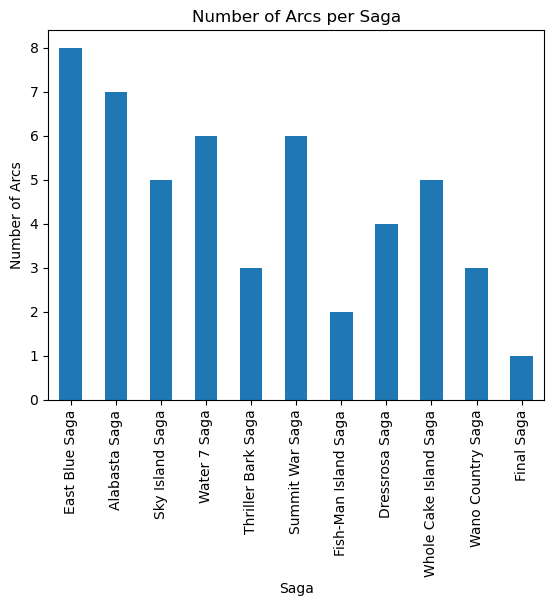

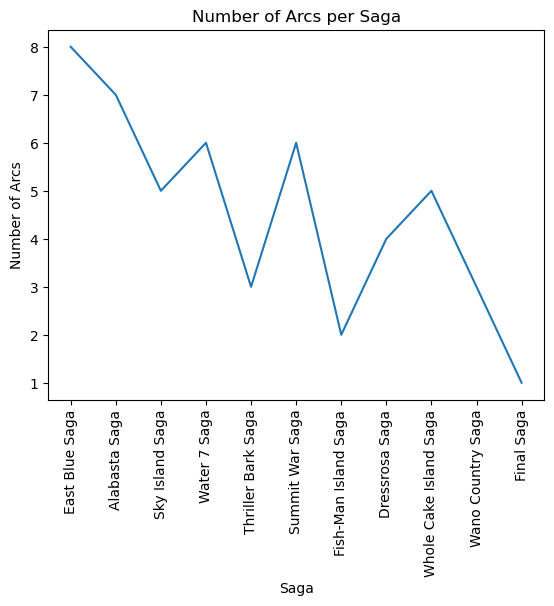

In [47]:
# Number of Arcs per Saga
saga_arc_counts = df.groupby('Saga')['Arc'].nunique()
saga_arc_counts = saga_arc_counts.reindex(df['Saga'].unique(), fill_value=0)
print(saga_arc_counts)

saga_arc_counts.plot(kind='bar')
plt.title('Number of Arcs per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Arcs')
plt.xticks(rotation=90, ticks=range(len(saga_arc_counts)), labels=saga_arc_counts.index )
plt.show()

saga_arc_counts.plot(kind='line')
plt.title('Number of Arcs per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Arcs')
plt.xticks(rotation=90, ticks=range(len(saga_arc_counts)), labels=saga_arc_counts.index )
plt.show()

In [49]:
# Average number of arcs per saga
print("On average there were: ", saga_arc_counts.mean())
# Maximum number of arcs per saga
print("The most arcs in a saga were: ", saga_arc_counts.max(), " during ", saga_arc_counts.idxmax())
# Minimum number of arcs per saga
print("The least arcs in a saga were: ", saga_arc_counts.min(), " during ", saga_arc_counts.idxmin())

On average there were:  4.545454545454546
The most arcs in a saga were:  8  during  East Blue Saga
The least arcs in a saga were:  1  during  Final Saga


### Years

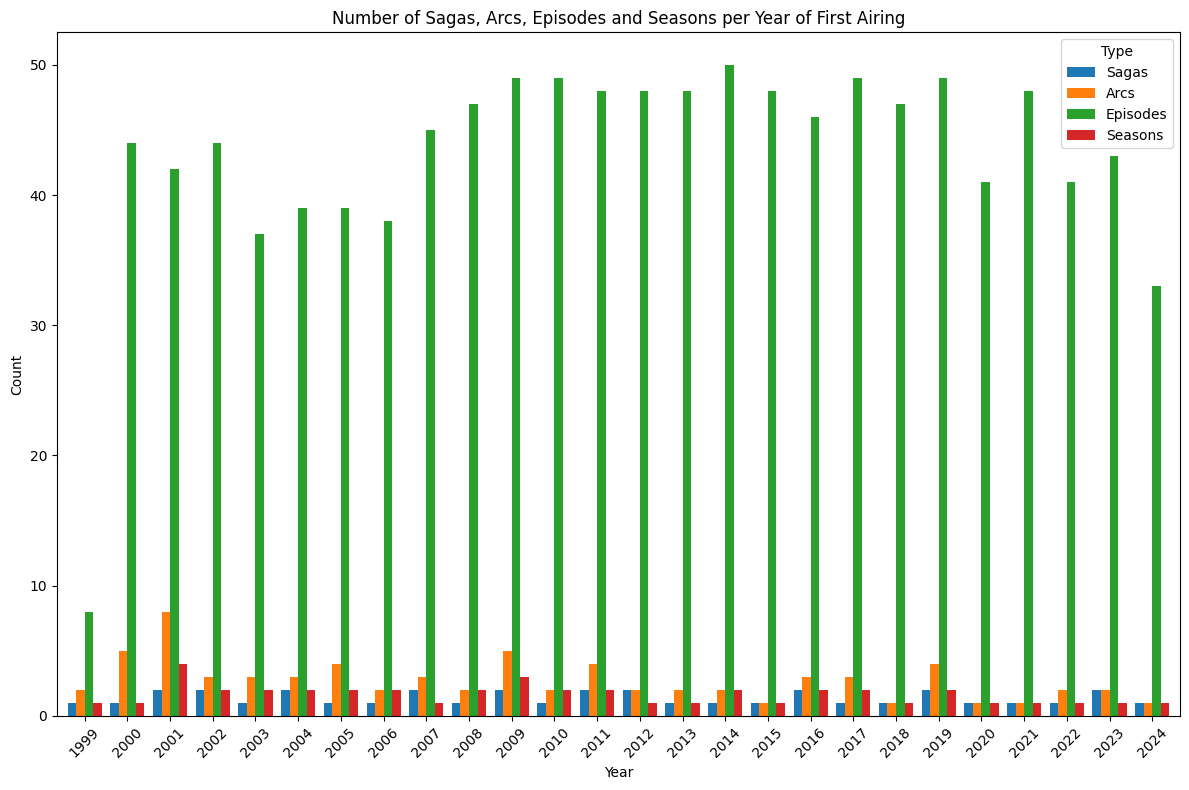

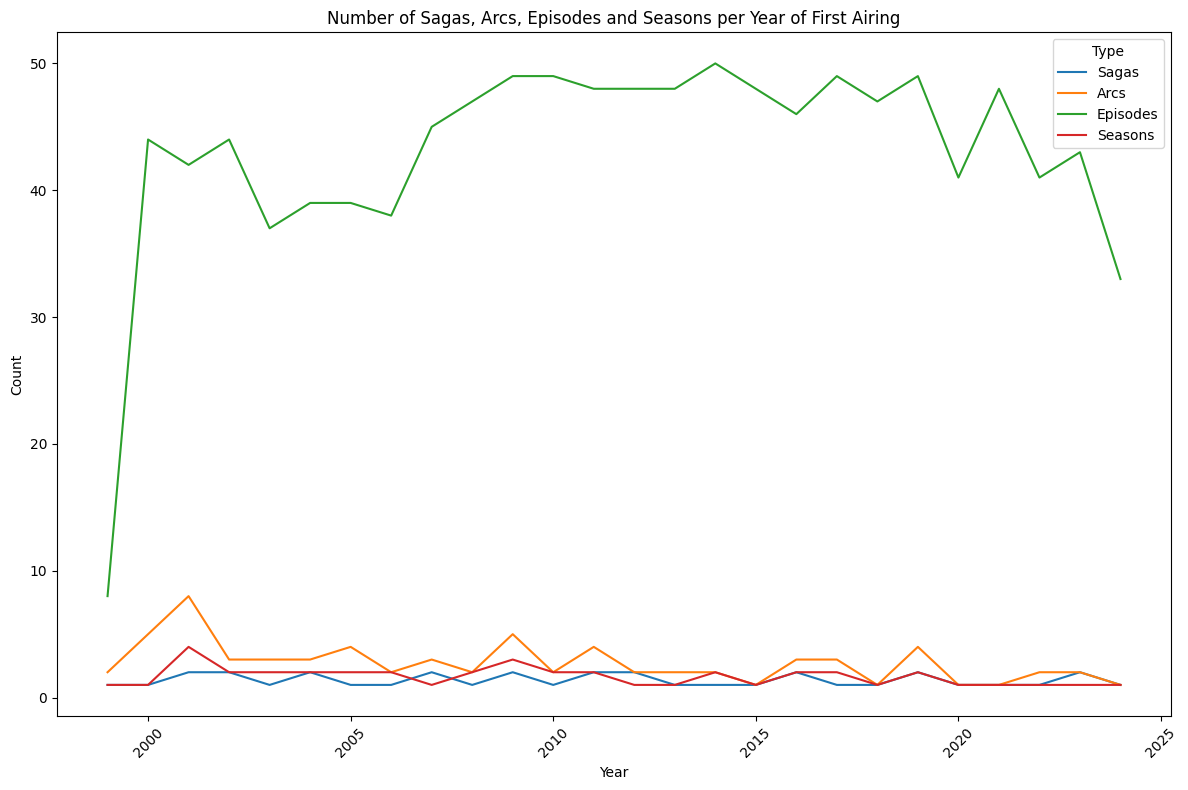

In [128]:
# Visualizing episodes, sagas and arcs over the Air Date year
df['airdate'] = pd.to_datetime(df['Air Date'])
df['airdate_year'] = df['airdate'].dt.year

sagas_per_year = df.groupby('airdate_year')['Saga'].nunique()
arcs_per_year = df.groupby('airdate_year')['Arc'].nunique()
eps_per_year = df['airdate_year'].value_counts().sort_index()
seasons_per_year = df.groupby('airdate_year')['Season'].nunique()

counts_df = pd.DataFrame({
    'Sagas': sagas_per_year,
    'Arcs': arcs_per_year,
    'Episodes': eps_per_year,
    'Seasons': seasons_per_year
}).fillna(0)

counts_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Number of Sagas, Arcs, Episodes and Seasons per Year of First Airing')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

counts_df.plot(figsize=(12, 8))
plt.title('Number of Sagas, Arcs, Episodes and Seasons per Year of First Airing')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


In [129]:
# Average number of episodes, sagas and arcs per year
avg_counts_df = counts_df.mean()
print("Average number of episodes, sagas and arcs per year")
print(avg_counts_df)

# Year with the most episodes
print("Year with the most episodes")
print(counts_df['Episodes'].idxmax(), " with ", counts_df['Episodes'].max(), " episodes")

# Year with the most sagas
print("Year with the most sagas")
print(counts_df['Sagas'].idxmax(), " with ", counts_df['Sagas'].max(), " sagas")

# Year with the most arcs
print("Year with the most arcs")
print(counts_df['Arcs'].idxmax(), " with ", counts_df['Arcs'].max(), " arcs")

# Year with the most seasons
print("Year with the most seasons")
print(counts_df['Seasons'].idxmax(), " with ", counts_df['Seasons'].max(), " seasons")

Average number of episodes, sagas and arcs per year
Sagas        1.384615
Arcs         2.730769
Episodes    43.076923
Seasons      1.653846
dtype: float64
Year with the most episodes
2014  with  50  episodes
Year with the most sagas
2001  with  2  sagas
Year with the most arcs
2001  with  8  arcs
Year with the most seasons
2001  with  4  seasons


In [130]:
print("Biggest gap between episodes")
print(df['airdate'].diff().head(10))

print("Episode with the biggest gap")
print(df.loc[df['airdate'].diff().idxmax()], " with a gap of ", df['airdate'].diff().max())

Biggest gap between episodes
0       NaT
1   28 days
2    7 days
3   14 days
4    7 days
5   14 days
6    0 days
7    0 days
8   14 days
9    7 days
Name: airdate, dtype: timedelta64[ns]
Episode with the biggest gap
Episode                                                       930
Title                         All-Star! Queen the Plague Appears!
Season                                                       20.0
Arc                                              Wano Country Arc
Saga                                            Wano Country Saga
Air Date                                               2020-06-28
Opening                                              OVER THE TOP
Ending                                                        NaN
Summary         Raizo disguises himself as a prison guard to g...
airdate                                       2020-06-28 00:00:00
airdate_year                                                 2020
Name: 928, dtype: object  with a gap of  70 days 00:00:00


### Seasons

In [131]:
# Season with the most episodes
print("Season with the most episodes")
print(df['Season'].value_counts().idxmax(), " with ", df['Season'].value_counts().max(), " episodes")

# Season with the most arcs
print("Season with the most arcs")
print(df.groupby('Season')['Arc'].nunique().idxmax(), " with ", df.groupby('Season')['Arc'].nunique().max(), " arcs")

# Season with the most sagas
print("Season with the most sagas")
print(df.groupby('Season')['Saga'].nunique().idxmax(), " with ", df.groupby('Season')['Saga'].nunique().max(), " sagas")

# Total number of seasons
print("Total number of seasons")
print(df['Season'].nunique())

# Episodes without a season
print("Episodes without a season")
print(df['Season'].isnull().sum())

# All episode numbers in season 5
print("All episode numbers in season 5")
print(df[df['Season'] == 5]['Episode'].unique())

Season with the most episodes
20.0  with  192  episodes
Season with the most arcs
1.0  with  8  arcs
Season with the most sagas
5.0  with  2  sagas
Total number of seasons
21
Episodes without a season
21
All episode numbers in season 5
[131 132 133 134 135 136 137 138 139 140 141 142 143]


### Openings and Endings

In [132]:
# Mean number of episodes per opening
print("Mean number of episodes per opening: ", opening_counts.mean())
# Opening with the most episodes
print("Opening with the most episodes: ", opening_counts.idxmax(), " with ", opening_counts.max(), " episodes")
# Opening with the least episodes
print("Opening with the least episodes: ", opening_counts.idxmin(), " with ", opening_counts.min(), " episodes")
# Mean number of openings per arcs
print("Mean number of openings per arc: ", df.groupby('Arc')['Opening'].nunique().mean())
# Arc with the most openings
print("Arc with the most openings: ", df.groupby('Arc')['Opening'].nunique().idxmax(), " with ", df.groupby('Arc')['Opening'].nunique().max(), " openings")
# Arc with the least openings
print("Arc with the least openings: ", df.groupby('Arc')['Opening'].nunique().idxmin(), " with ", df.groupby('Arc')['Opening'].nunique().min(), " openings")
# Mean number of openings per saga
print("Mean number of openings per saga: ", df.groupby('Saga')['Opening'].nunique().mean())
# Saga with the most openings
print("Saga with the most openings: ", df.groupby('Saga')['Opening'].nunique().idxmax(), " with ", df.groupby('Saga')['Opening'].nunique().max(), " openings")
# Saga with the least openings
print("Saga with the least openings: ", df.groupby('Saga')['Opening'].nunique().idxmin(), " with ", df.groupby('Saga')['Opening'].nunique().min(), " openings")



Mean number of episodes per opening:  41.48148148148148
Opening with the most episodes:  We Go!  with  73  episodes
Opening with the least episodes:  New Genesis  with  3  episodes
Mean number of openings per arc:  1.4
Arc with the most openings:  Wano Country Arc  with  7  openings
Arc with the least openings:  Amazon Lily Arc  with  1  openings
Mean number of openings per saga:  3.090909090909091
Saga with the most openings:  Wano Country Saga  with  7  openings
Saga with the least openings:  Fish-Man Island Saga  with  1  openings


As we can see above, there are 2 different opening that are the same, but due to their slight difference in uppercase vs lowercaser (Version vs version), they were counted as different, let us join them

Opening
We Go!                         73
DREAMIN' ON                    69
Believe                        68
PAINT                          66
We Can!                        60
Hard Knock Days                60
Wake up!                       58
Kokoro no Chizu                57
Hikari e                       53
Hope                           49
We Are!                        48
Jungle P                       47
OVER THE TOP                   43
Crazy Rainbow                  42
Hands Up!                      38
BON VOYAGE!                    38
Super Powers                   36
One day                        34
Kaze wo Sagashite              33
UUUUUS!                        33
Share the World                31
Fight Together                 24
We Are! (2008 Remix)           22
Saiko Totatsuten               15
Brand New World                15
We Are! (Straw Hat Version)     5
New Genesis                     3
Name: count, dtype: int64


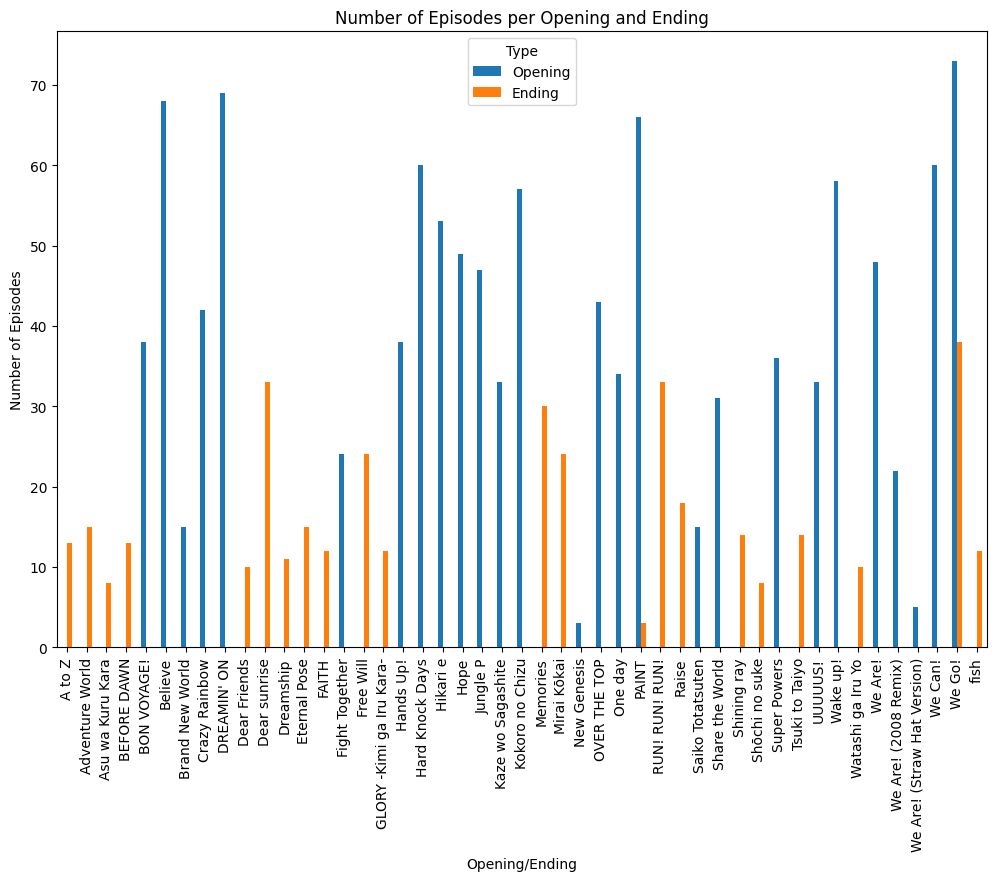

Number of unique openings:  27
Number of unique endings:  22


In [133]:
print(df['Opening'].value_counts())
opening_counts = df['Opening'].value_counts()
ending_counts = df['Ending'].value_counts()

#opening_counts =  opening_counts.loc[df['Opening'].unique()]
#ending_counts = ending_counts.loc[df['Ending'].unique()]

counts_df = pd.DataFrame({
    'Opening': opening_counts,
    'Ending': ending_counts
}).fillna(0)
counts_df.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Opening and Ending')
plt.xlabel('Opening/Ending')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()
print("Number of unique openings: ", df['Opening'].nunique())
print("Number of unique endings: ", df['Ending'].nunique())

In [134]:
# Mean number of episodes per ending
print("Mean number of episodes per ending: ", ending_counts.mean())
# Ending with the most episodes
print("Ending with the most episodes: ", ending_counts.idxmax(), " with ", ending_counts.max(), " episodes")
# Ending with the least episodes
print("Ending with the least episodes: ", ending_counts.idxmin(), " with ", ending_counts.min(), " episodes")
# Mean number of endings per arcs
print("Mean number of endings per arc: ", df.groupby('Arc')['Ending'].nunique().mean())
# Arc with the most endings
print("Arc with the most endings: ", df.groupby('Arc')['Ending'].nunique().idxmax(), " with ", df.groupby('Arc')['Ending'].nunique().max(), " endings")
# Mean number of endings per saga
print("Mean number of endings per saga: ", df.groupby('Saga')['Ending'].nunique().mean())
# Saga with the most endings
print("Saga with the most endings: ", df.groupby('Saga')['Ending'].nunique().idxmax(), " with ", df.groupby('Saga')['Ending'].nunique().max(), " endings")
# Saga with the least endings
print("Saga with the least endings: ", df.groupby('Saga')['Ending'].nunique().idxmin(), " with ", df.groupby('Saga')['Ending'].nunique().min(), " endings")

Mean number of episodes per ending:  16.818181818181817
Ending with the most episodes:  We Go!  with  38  episodes
Ending with the least episodes:  PAINT  with  3  episodes
Mean number of endings per arc:  0.88
Arc with the most endings:  Alabasta Arc  with  4  endings
Mean number of endings per saga:  2.272727272727273
Saga with the most endings:  Alabasta Saga  with  8  endings
Saga with the least endings:  Fish-Man Island Saga  with  0  endings


Remove columns we no longer need

In [135]:
df = df.drop(columns=['Air Date', 'airdate_year'])
print(df.head())

   Episode                                              Title  Season               Arc            Saga  Opening    Ending                                            Summary    airdate
0        1  I'm Luffy! The Man Who Will Become the Pirate ...     1.0  Romance Dawn Arc  East Blue Saga  We Are!  Memories  Luffy is cast at sea in a barrel. Sailors on a... 1999-10-20
1        2  The Great Swordsman Appears! Pirate Hunter Ror...     1.0  Romance Dawn Arc  East Blue Saga  We Are!  Memories  Luffy and Koby arrive at Shells Town, a town w... 1999-11-17
2        3  Morgan vs. Luffy! Who's This Mysterious Beauti...     1.0  Romance Dawn Arc  East Blue Saga  We Are!  Memories  Luffy returns the katana to Zoro, who uses the... 1999-11-24
3        4       Luffy's Past! The Red-Haired Shanks Appears!     1.0   Orange Town Arc  East Blue Saga  We Are!  Memories  The burglar girl's dinghy is discovered by thr... 1999-12-08
4        5  Fear, Mysterious Power! Pirate Clown Captain B...     1.0   Ora

Save our already processed data for further use in text analysis and later with solr

In [136]:
df.to_csv("data2.csv", index=False)